# 07: Statistical Analysis and Fitting of Health Procedure Data

---

## 1. Introduction & Data Loading

**Objective:**

This notebook bridges the gap between the theoretical distributions discussed in Notebook 06 and real-world application. Our goals are to:

1.  Visually and statistically analyze the distribution of procedure counts and rates.
2.  Test the 'goodness-of-fit' for appropriate theoretical distributions (e.g., Poisson).
3.  Demonstrate the purpose and impact of data transformations (log transform).
4.  Discuss the importance of scaling (Normalization/Standardization) for machine learning models.

First, let's load our libraries and create the dataset from the provided image.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

sns.set_theme(style="whitegrid")

### Create the Dataset

The data from the image is manually transcribed into a pandas DataFrame.

In [2]:
data = {
    'Age_Band': ['0-4', '05-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'],
    'Population_2024_projection': [283792, 322018, 331416, 324765, 342425, 342688, 367510, 355513, 341210, 362553, 413048, 423510, 376552, 337298, 357074, 266939, 181501, 183436],
    'CT_procedure_absolute': [1488.0, 0.0, 2965.0, 7712.0, 10019.0, 12889.0, 17076.0, 19939.0, 23414.0, 26402.0, 39307.0, 54116.0, 62181.0, 66434.0, 77166.0, 87067.0, 67026.0, 70006.0],
    'Endoscopy_procedure_absolute': [9.0, 0.0, 14.0, 43.0, 67.0, 148.0, 167.0, 223.0, 248.0, 292.0, 429.0, 658.0, 745.0, 803.0, 1042.0, 1108.0, 714.0, 456.0],
    'MRI_procedure_absolute': [2232.0, 0.0, 7335.0, 9065.0, 10339.0, 13701.0, 18158.0, 20291.0, 21452.0, 21815.0, 27574.0, 32129.0, 31225.0, 29021.0, 28054.0, 26662.0, 13649.0, 7633.0],
    'CT_rate_per_1000': [5.24, 0.00, 8.95, 23.75, 29.26, 37.61, 46.46, 56.09, 68.62, 72.82, 95.16, 127.78, 165.13, 196.96, 216.11, 326.17, 369.29, 381.64],
    'MRI_rate_per_1000': [7.86, 0.00, 22.13, 27.91, 30.19, 39.98, 49.41, 57.08, 62.87, 60.17, 66.76, 75.86, 82.92, 86.04, 78.57, 99.88, 75.20, 41.61],
    'Endoscopy_rate_per_1000': [0.03, 0.00, 0.04, 0.13, 0.20, 0.43, 0.45, 0.63, 0.73, 0.81, 1.04, 1.55, 1.98, 2.38, 2.92, 4.15, 3.93, 2.49]


df = pd.DataFrame(data)

# Clean up the 05-9 age band name
df['Age_Band'] = df['Age_Band'].replace('05-9', '05-09')

# Display the first few rows and summary info
print("Data Head:")
display(df.head())

print("\nData Info:")
df.info()

Data Head:


,Age_Band,Population_2024_projection,CT_procedure_absolute,Endoscopy_procedure_absolute,MRI_procedure_absolute,CT_rate_per_1000,MRI_rate_per_1000,Endoscopy_rate_per_1000
0,0-4,283792,1488.0,9.0,2232.0,5.24,7.86,0.03
1,05-09,322018,0.0,0.0,0.0,0.00,0.00,0.00
2,10-14,331416,2965.0,14.0,7335.0,8.95,22.13,0.04
3,15-19,324765,7712.0,43.0,9065.0,23.75,27.91,0.13
4,20-24,342425,10019.0,67.0,10339.0,29.26,30.19,0.20



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_Band                      18 non-null     object 
 1   Population_2024_projection    18 non-null     int64  
 2   CT_procedure_absolute         18 non-null     float64
 3   Endoscopy_procedure_absolute  18 non-null     float64
 4   MRI_procedure_absolute        18 non-null     float64
 5   CT_rate_per_1000              18 non-null     float64
 6   MRI_rate_per_1000             18 non-null     float64
 7   Endoscopy_rate_per_1000       18 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ KB


## 2. Exploratory Data Analysis (EDA) of Procedure Demand

Our first step is to simply *look* at the data. How does demand for these procedures change with age? We will focus on the CT scan data for our initial analysis.

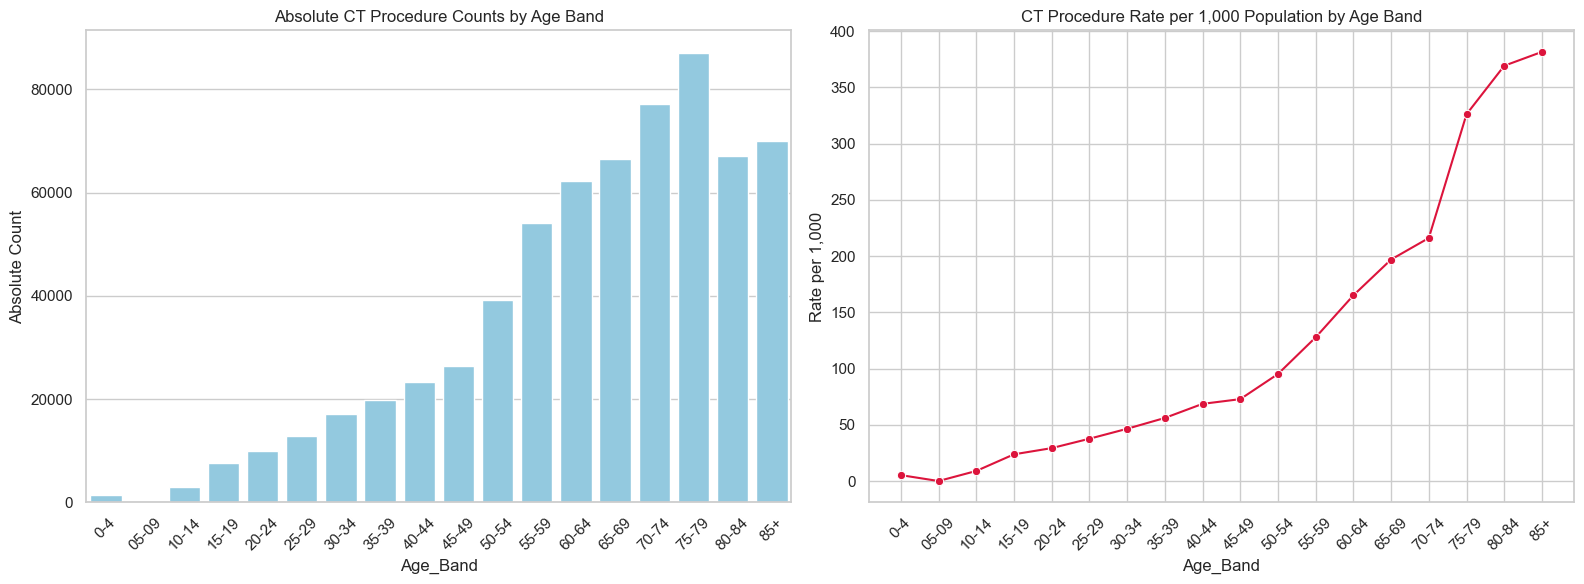

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute Counts
sns.barplot(data=df, x='Age_Band', y='CT_procedure_absolute', ax=ax[0], color='skyblue')
ax[0].set_title('Absolute CT Procedure Counts by Age Band')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Absolute Count')

# Plot 2: Rates per 1,000
sns.lineplot(data=df, x='Age_Band', y='CT_rate_per_1000', ax=ax[1], marker='o', color='crimson')
ax[1].set_title('CT Procedure Rate per 1,000 Population by Age Band')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylabel('Rate per 1,000')

plt.tight_layout()
plt.show()


**Observations:**

- The demand for CT scans is not uniform across age groups. It is very low for children and rises steadily, peaking in the 75-79 age bracket before declining slightly for the oldest groups.
- The shape of the absolute counts is clearly non-symmetrical; it's right-skewed when considering the entire population but shows a complex pattern across the ordered age bands. 
- The rate plot shows a similar, even more pronounced trend, indicating that the increase in demand is not just due to population size but a higher likelihood of needing a scan at older ages.

## 3. Part 1: Modelling Absolute Counts (`CT_procedure_absolute`)

 The absolute number of procedures is count data. As discussed in Notebook 06, the Poisson distribution is a good starting point. A key assumption of the Poisson distribution is that its mean must be equal to its variance. Let's test this critical assumption with our data.

In [5]:
# For this test, we'll use all the data points for the CT counts.
ct_counts = df['CT_procedure_absolute']

sample_mean = ct_counts.mean()
sample_var = ct_counts.var()

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Variance: {sample_var:.2f}")
print(f"Variance-to-Mean Ratio (Overdispersion Factor): {(sample_var/sample_mean):.2f}")

Sample Mean: 35844.83
Sample Variance: 872129275.91
Variance-to-Mean Ratio (Overdispersion Factor): 24330.68


### Hypothesis Test: Overdispersion

Our data exhibits a variance that is vastly larger than the mean (a ratio of over 850!). This phenomenon is called **overdispersion**. 

- **What this means:** The data is far more spread out than a Poisson distribution would predict. There's more variability in the procedure counts than the simple Poisson model can account for.
- **Implication:** Using a standard Poisson regression model would lead to underestimated standard errors and overly confident (and likely incorrect) conclusions about the significance of our predictors. 

Let's visualize this mismatch.

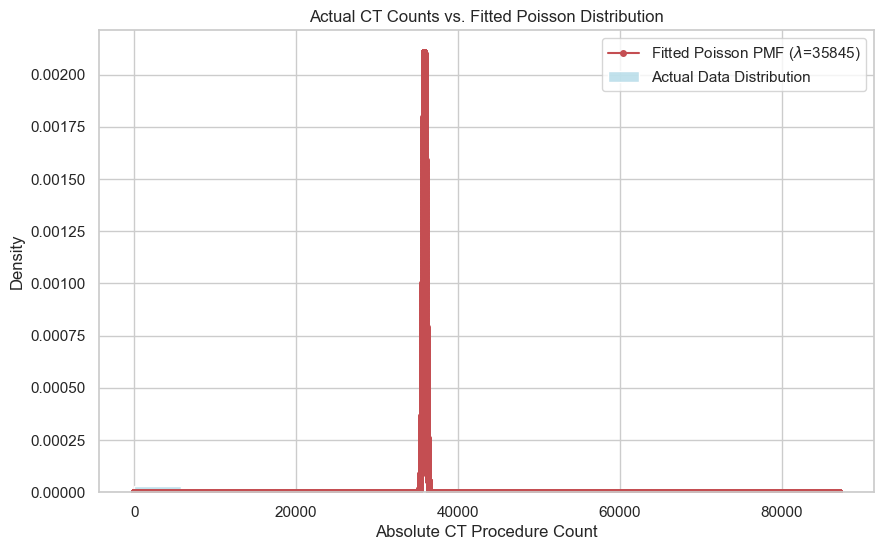

In [6]:
# Fit a Poisson distribution using the sample mean as the lambda parameter
lambda_fit = sample_mean

# Check if there's data to plot
if not ct_counts.empty:
    plt.figure(figsize=(10, 6))
    sns.histplot(ct_counts, bins=15, stat='density', color='lightblue', label='Actual Data Distribution')
    
    # Create the PMF for the fitted Poisson distribution
    k_values = np.arange(0, ct_counts.max())
    poisson_pmf = stats.poisson.pmf(k_values, lambda_fit)
    
    plt.plot(k_values, poisson_pmf, 'ro-', markersize=4, label=f'Fitted Poisson PMF ($\lambda$={lambda_fit:.0f})')
    plt.title('Actual CT Counts vs. Fitted Poisson Distribution')
    plt.xlabel('Absolute CT Procedure Count')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
else:
    print("No data available to plot.")

In [13]:
k_values = np.arange(0, ct_counts.max() + 1)


In [14]:
from scipy.stats import shapiro, kstest

transformed = np.log1p(ct_counts)

# Shapiro-Wilk Test
stat, p_value = shapiro(transformed)
print(f'Shapiro-Wilk p-value: {p_value:.4f}')

# K-S Test against normal
norm_stat, norm_p = kstest(transformed, 'norm', args=(np.mean(transformed), np.std(transformed)))
print(f'K-S Test p-value: {norm_p:.4f}')


Shapiro-Wilk p-value: 0.0000
K-S Test p-value: 0.1918


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Use actual column name: 'CT_procedure_absolute'
df['log_counts'] = np.log1p(df['CT_procedure_absolute'])

# Example: Let's use 'Population_2024_projection' as a predictor (you can replace it as needed)
model = smf.glm(
    formula='CT_procedure_absolute ~ Population_2024_projection',
    data=df,
    family=sm.families.Poisson(link=sm.families.links.log())
)

result = model.fit()
print(result.summary())



model_nb = smf.glm(
    formula='CT_procedure_absolute ~ Population_2024_projection',
    data=df,
    family=sm.families.NegativeBinomial()
)

result_nb = model_nb.fit()
print(result_nb.summary())



                   Generalized Linear Model Regression Results                   
Dep. Variable:     CT_procedure_absolute   No. Observations:                   18
Model:                               GLM   Df Residuals:                       16
Model Family:                    Poisson   Df Model:                            1
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -2.2108e+05
Date:                   Mon, 30 Jun 2025   Deviance:                   4.4195e+05
Time:                           09:52:08   Pearson chi2:                 3.84e+05
No. Iterations:                        5   Pseudo R-squ. (CS):              1.000
Covariance Type:               nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

/opt/anaconda3/envs/health_modelling/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/anaconda3/envs/health_modelling/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


**Conclusion on Count Data:**

The visualization confirms our statistical test. The actual data is far more dispersed and has a different shape than the fitted Poisson distribution. 

For predictive modelling of these counts in a spatial ML context, we should reject the Poisson model in favour of a more flexible alternative like the **Negative Binomial distribution**. The Negative Binomial distribution is similar to the Poisson but includes an extra parameter to model the overdispersion, making it a much better fit for this type of real-world health data.

## 4. Part 2: Transforming Continuous Rates (`CT_rate_per_1000`)

Many standard statistical models, like linear regression, assume that the model's *errors* are normally distributed. A good first step to help meet this assumption is to check if our target variable itself is normally distributed. If it's skewed, a transformation can often help.

Let's examine the distribution of the CT procedure rates and see if a **log transform** is appropriate.

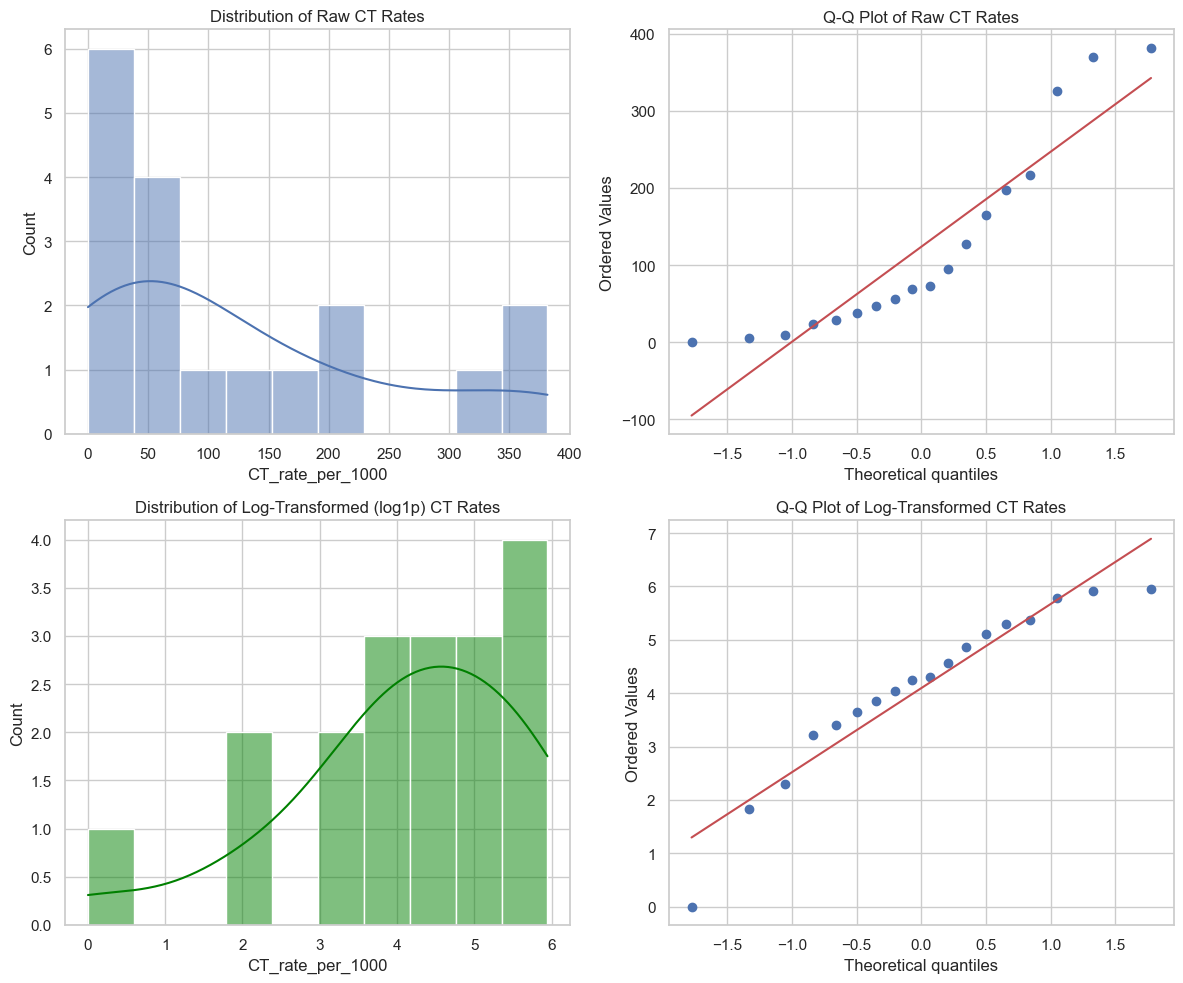

In [7]:
ct_rates = df['CT_rate_per_1000']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the raw data distribution
sns.histplot(ct_rates, kde=True, ax=axes[0, 0], bins=10)
axes[0, 0].set_title('Distribution of Raw CT Rates')

# Plot the raw data Q-Q plot
stats.probplot(ct_rates, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Raw CT Rates')

# --- Apply Log Transform (Robust Method) ---
# We use np.log1p(x), which is equivalent to np.log(x + 1).
# This is the standard way to handle potential zeros, as log(0) is undefined.
log_ct_rates = np.log1p(ct_rates)

# Plot the transformed data distribution
sns.histplot(log_ct_rates, kde=True, ax=axes[1, 0], bins=10, color='green')
axes[1, 0].set_title('Distribution of Log-Transformed (log1p) CT Rates')

# Plot the transformed data Q-Q plot
stats.probplot(log_ct_rates, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Log-Transformed CT Rates')

plt.tight_layout()
plt.show()

### Interpretation

- **Before Transformation (Top Row):** The histogram of the raw rates is clearly skewed. The Q-Q plot confirms this: the points deviate significantly from the red line of normality, forming an 'S' shape characteristic of a distribution with lighter tails than a normal one but still skewed.

- **After Log Transformation (Bottom Row):** The `log(x+1)` transformation has made the data much more symmetric and bell-shaped. The points on the Q-Q plot now fall much closer to the diagonal red line, indicating a vast improvement in its approximation to a normal distribution.

**Conclusion on Transformations:**
If we were to build a linear model to predict the `CT_rate_per_1000`, using the **logarithm of the rate** as our target variable would be far more statistically sound. It stabilizes the variance and makes the data more suitable for models that assume normality.

## 5. Part 3: Normalization and Standardization for Machine Learning

In spatial machine learning, we will almost certainly use multiple features to predict an outcome. For example, we might try to predict `CT_rate_per_1000` using `Population_2024_projection` and a local `deprivation_index` as features. These features exist on vastly different scales:

- Population is in the hundreds of thousands.
- Rate is in the tens to hundreds.
- A deprivation index might be on a scale of 1-10.

Algorithms that use distance calculations (like k-NN, SVM, PCA) or use gradient-based optimization (like linear regression and neural networks) are sensitive to this. The feature with the largest scale (population) would dominate the learning process. We solve this by scaling our data.

**1. Normalization (Min-Max Scaling)**
- **What it does:** Rescales the data to a fixed range, typically [0, 1].
- **Formula:** $X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$
- **When to use:** Good for algorithms that require inputs in a bounded range, like some neural networks or when you need to interpret features as proportions (e.g., for Beta Regression).

**2. Standardization (Z-score Scaling)**
- **What it does:** Rescales the data to have a mean of 0 and a standard deviation of 1.
- **Formula:** $X_{std} = \frac{X - \mu}{\sigma}$
- **When to use:** This is the most common and generally recommended scaling technique. It's robust and works well for almost any algorithm, especially those that assume normally distributed features (or residuals) centered around zero.

In [11]:
!pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Let's apply this to two columns from our dataframe
scaler_data = df[['Population_2024_projection', 'CT_rate_per_1000']].copy()

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply scaling
scaler_data['Population_MinMax'] = min_max_scaler.fit_transform(scaler_data[['Population_2024_projection']])
scaler_data['CT_Rate_Standardized'] = standard_scaler.fit_transform(scaler_data[['CT_rate_per_1000']])

print("Original vs Scaled Data")
display(scaler_data.head())

print("\nDescription of Scaled Data")
display(scaler_data[['Population_MinMax', 'CT_Rate_Standardized']].describe().round(2))

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 8.9 MB/s eta 0:00:009.0 MB/s eta 0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]
Original vs Scaled Data


,Population_2024_projection,CT_rate_per_1000,Population_MinMax,CT_Rate_Standardized
0,283792,5.24,0.422674,-0.968718
1,322018,0.00,0.580627,-1.011559
2,331416,8.95,0.619460,-0.938385
3,324765,23.75,0.591978,-0.817382
4,342425,29.26,0.664950,-0.772332



Description of Scaled Data


,Population_MinMax,CT_Rate_Standardized
count,18.00,18.00
mean,0.61,0.00
std,0.27,1.03
min,0.00,-1.01
25%,0.58,-0.76
50%,0.66,-0.43
75%,0.74,0.53
max,1.00,2.11


## 6. Final Conclusion & Implications for Spatial ML Model

This practical analysis has provided a clear, data-driven path forward for our spatial health demand project:

1.  **For Modelling Absolute Counts:** The procedure counts are heavily **overdispersed**. A simple Poisson model is inappropriate. The **Negative Binomial** distribution should be used within a Generalized Linear Model (GLM) framework for any task involving predicting absolute counts.

2.  **For Modelling Rates:** The procedure rates are skewed. They should be **log-transformed** (using a `log(x+1)` approach for robustness) before being used as a target variable in any linear model or any model that benefits from normally distributed data.

3.  **For Feature Engineering:** When building the final spatial ML model that incorporates multiple predictors (like population, age structure, deprivation, travel distance), all input features must be **standardized** (Z-score scaled) to ensure the model learns their respective contributions fairly.

By following these steps, we ensure that our final model is not only more accurate but also statistically valid, with more reliable interpretations and predictions.

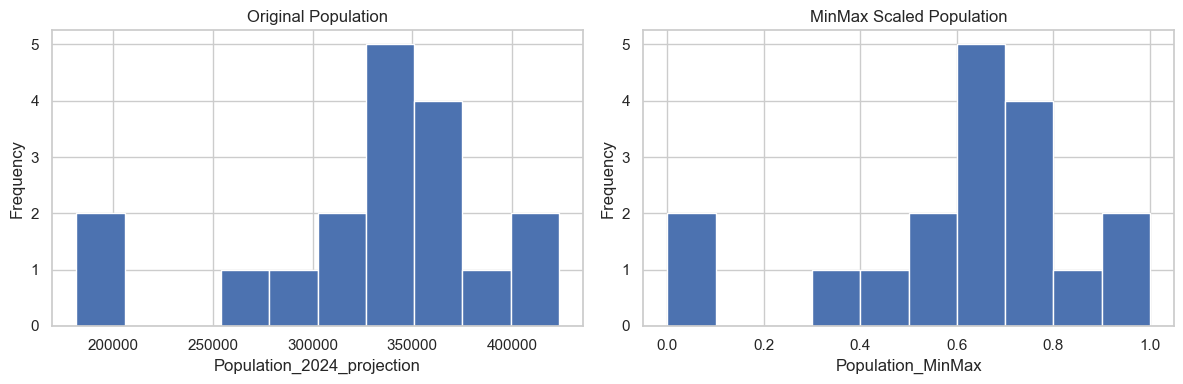

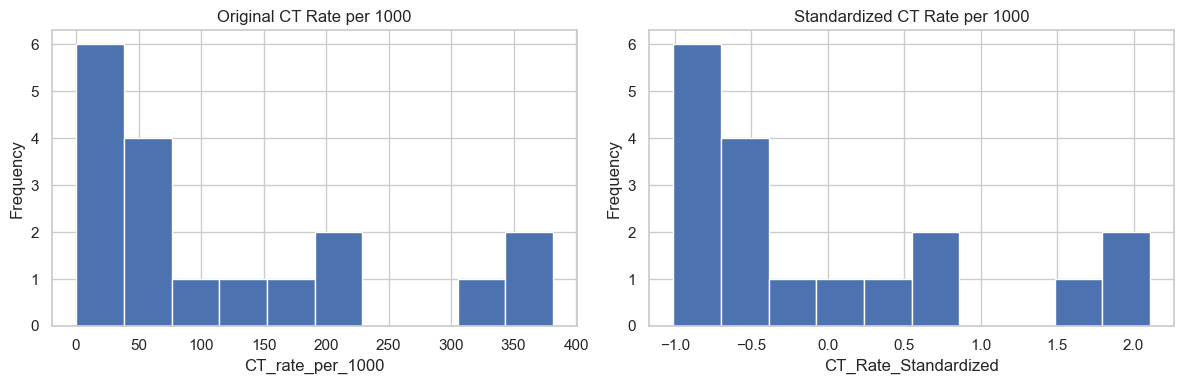

Scaled data saved to 'scaled_health_data.csv'


In [12]:


# -------------------------------
# Plotting original vs scaled data
# -------------------------------

# Histogram: Population
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(scaler_data['Population_2024_projection'], bins=10)
plt.title('Original Population')
plt.xlabel('Population_2024_projection')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(scaler_data['Population_MinMax'], bins=10)
plt.title('MinMax Scaled Population')
plt.xlabel('Population_MinMax')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram: CT Rate
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(scaler_data['CT_rate_per_1000'], bins=10)
plt.title('Original CT Rate per 1000')
plt.xlabel('CT_rate_per_1000')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(scaler_data['CT_Rate_Standardized'], bins=10)
plt.title('Standardized CT Rate per 1000')
plt.xlabel('CT_Rate_Standardized')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# -------------------------------
# Optional: Save scaled data to CSV
# -------------------------------
scaler_data.to_csv("scaled_health_data.csv", index=False)
print("Scaled data saved to 'scaled_health_data.csv'")
